In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# dataset = '/kaggle/input/mediapip4/keypoint.csv'
model_save_path = 'keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 26

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                286       
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
25/25 [==============================] - 1s 13ms/step - loss: 3.2520 - accuracy: 0.0282 - val_loss: 3.2167 - val_accuracy: 0.0279

Epoch 00001: saving model to keypoint_classifier.hdf5
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2227 - accuracy: 0.0625 - val_loss: 3.1814 - val_accuracy: 0.1066

Epoch 00002: saving model to keypoint_classifier.hdf5
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.1798 - accuracy: 0.0868 - val_loss: 3.1230 - val_accuracy: 0.1278

Epoch 00003: saving model to keypoint_classifier.hdf5
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.1180 - accuracy: 0.1253 - val_loss: 3.0197 - val_accuracy: 0.1998

Epoch 00004: saving model to keypoint_classifier.hdf5
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.0363 - accuracy: 0.1506 - val_loss: 2.9045 - val_accuracy: 0.2565

Epoch 00005: saving model to keypoint_classifier.hdf5
Epoch 6/1000
2

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.9664


In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.4961416e-10 7.2891504e-01 1.2391234e-04 1.4279917e-04 3.6163352e-02
 2.0238982e-01 1.0031605e-14 1.0044482e-12 1.7883481e-02 7.3609932e-08
 1.5010886e-16 1.3195840e-09 8.8361753e-03 7.8996905e-05 4.7037899e-04
 9.0784935e-11 2.5041424e-11 2.7759510e-04 2.6101780e-03 7.7195343e-09
 1.8051298e-06 9.7450844e-08 2.1032980e-03 1.7534518e-12 3.0244423e-06
 3.1250804e-11]
1


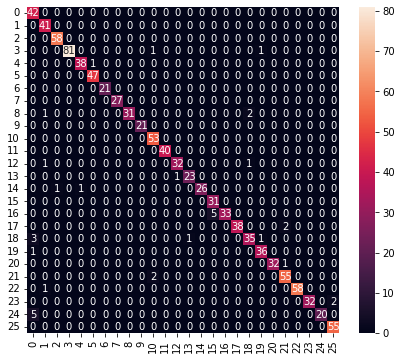

Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        42
           1       0.93      1.00      0.96        41
           2       0.98      1.00      0.99        58
           3       1.00      0.98      0.99        83
           4       0.97      0.97      0.97        39
           5       0.98      1.00      0.99        47
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        27
           8       1.00      0.91      0.95        34
           9       1.00      1.00      1.00        21
          10       0.95      1.00      0.97        53
          11       1.00      1.00      1.00        40
          12       0.97      0.94      0.96        34
          13       0.96      0.96      0.96        24
          14       1.00      0.93      0.96        28
          15       0.86      1.00      0.93        31
          16       1.00      0.87      0.93        38
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model.save(model_save_path, include_optimizer=False)

In [17]:
# tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
tflite_save_path = 'keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7312

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

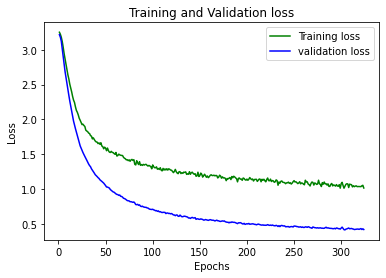

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,325)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,403)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()